Language Models
* Bigram Character Level 
* Bag of words (n-gram)
* MLP
* RNN
* GRU
* TRANSFORMER

bigram char level model =  `P(next char | prev char)`

In [25]:
with open("names.txt", 'r') as f:
    names = f.readlines()
    names = [x.strip() for x in names]

print(names[:10])
print(f"total #of names: {len(names)}")

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
total # of names: 32033


In [33]:
matrix = [[0]*27]*27
characters = list(set(''.join(names)))
characters_all = ['#'] + characters + ['$']

idx_to_char = dict()
for idx, value in enumerate(characters_all):
    idx_to_char[idx] = value

char_to_idx = dict()
char_to_idx = {char:idx for idx, char in idx_to_char.items()}
print(f"idx_to_char: {idx_to_char}")
print(f"char_to_dix: {char_to_idx}")


bigram_count = dict()
for char_a in characters_all:
    for char_b in characters_all:
        bigram_count[(char_a, char_b)] = 0

idx_to_char: {0: '#', 1: 't', 2: 'z', 3: 'u', 4: 'o', 5: 's', 6: 'q', 7: 'e', 8: 'l', 9: 'n', 10: 'm', 11: 'x', 12: 'a', 13: 'k', 14: 'y', 15: 'v', 16: 'w', 17: 'b', 18: 'g', 19: 'd', 20: 'r', 21: 'i', 22: 'h', 23: 'j', 24: 'p', 25: 'c', 26: 'f', 27: '$'}
char_to_dix: {'#': 0, 't': 1, 'z': 2, 'u': 3, 'o': 4, 's': 5, 'q': 6, 'e': 7, 'l': 8, 'n': 9, 'm': 10, 'x': 11, 'a': 12, 'k': 13, 'y': 14, 'v': 15, 'w': 16, 'b': 17, 'g': 18, 'd': 19, 'r': 20, 'i': 21, 'h': 22, 'j': 23, 'p': 24, 'c': 25, 'f': 26, '$': 27}


## Plot the frequency of bi-gram 

In [18]:
for w in names:
    w = '#' + w + '$'
    for char_a, char_b in zip(w, w[1:]):
        bigram_count[(char_a, char_b)] +=1

"total bigram count", len(bigram_count)


('total bigram count', 784)

In [19]:
bigram_sorted = sorted(bigram_count.items(), key=lambda key: (key[0][0], key[0][1]))
bigram_matrix = [bigram_sorted[i:i+28] for i in range(0, 28*28, 28)]


## Observations
* Many many names (13280 in total) end with 'a'
* Most names start with 'a' or 'k'

<AxesSubplot:>

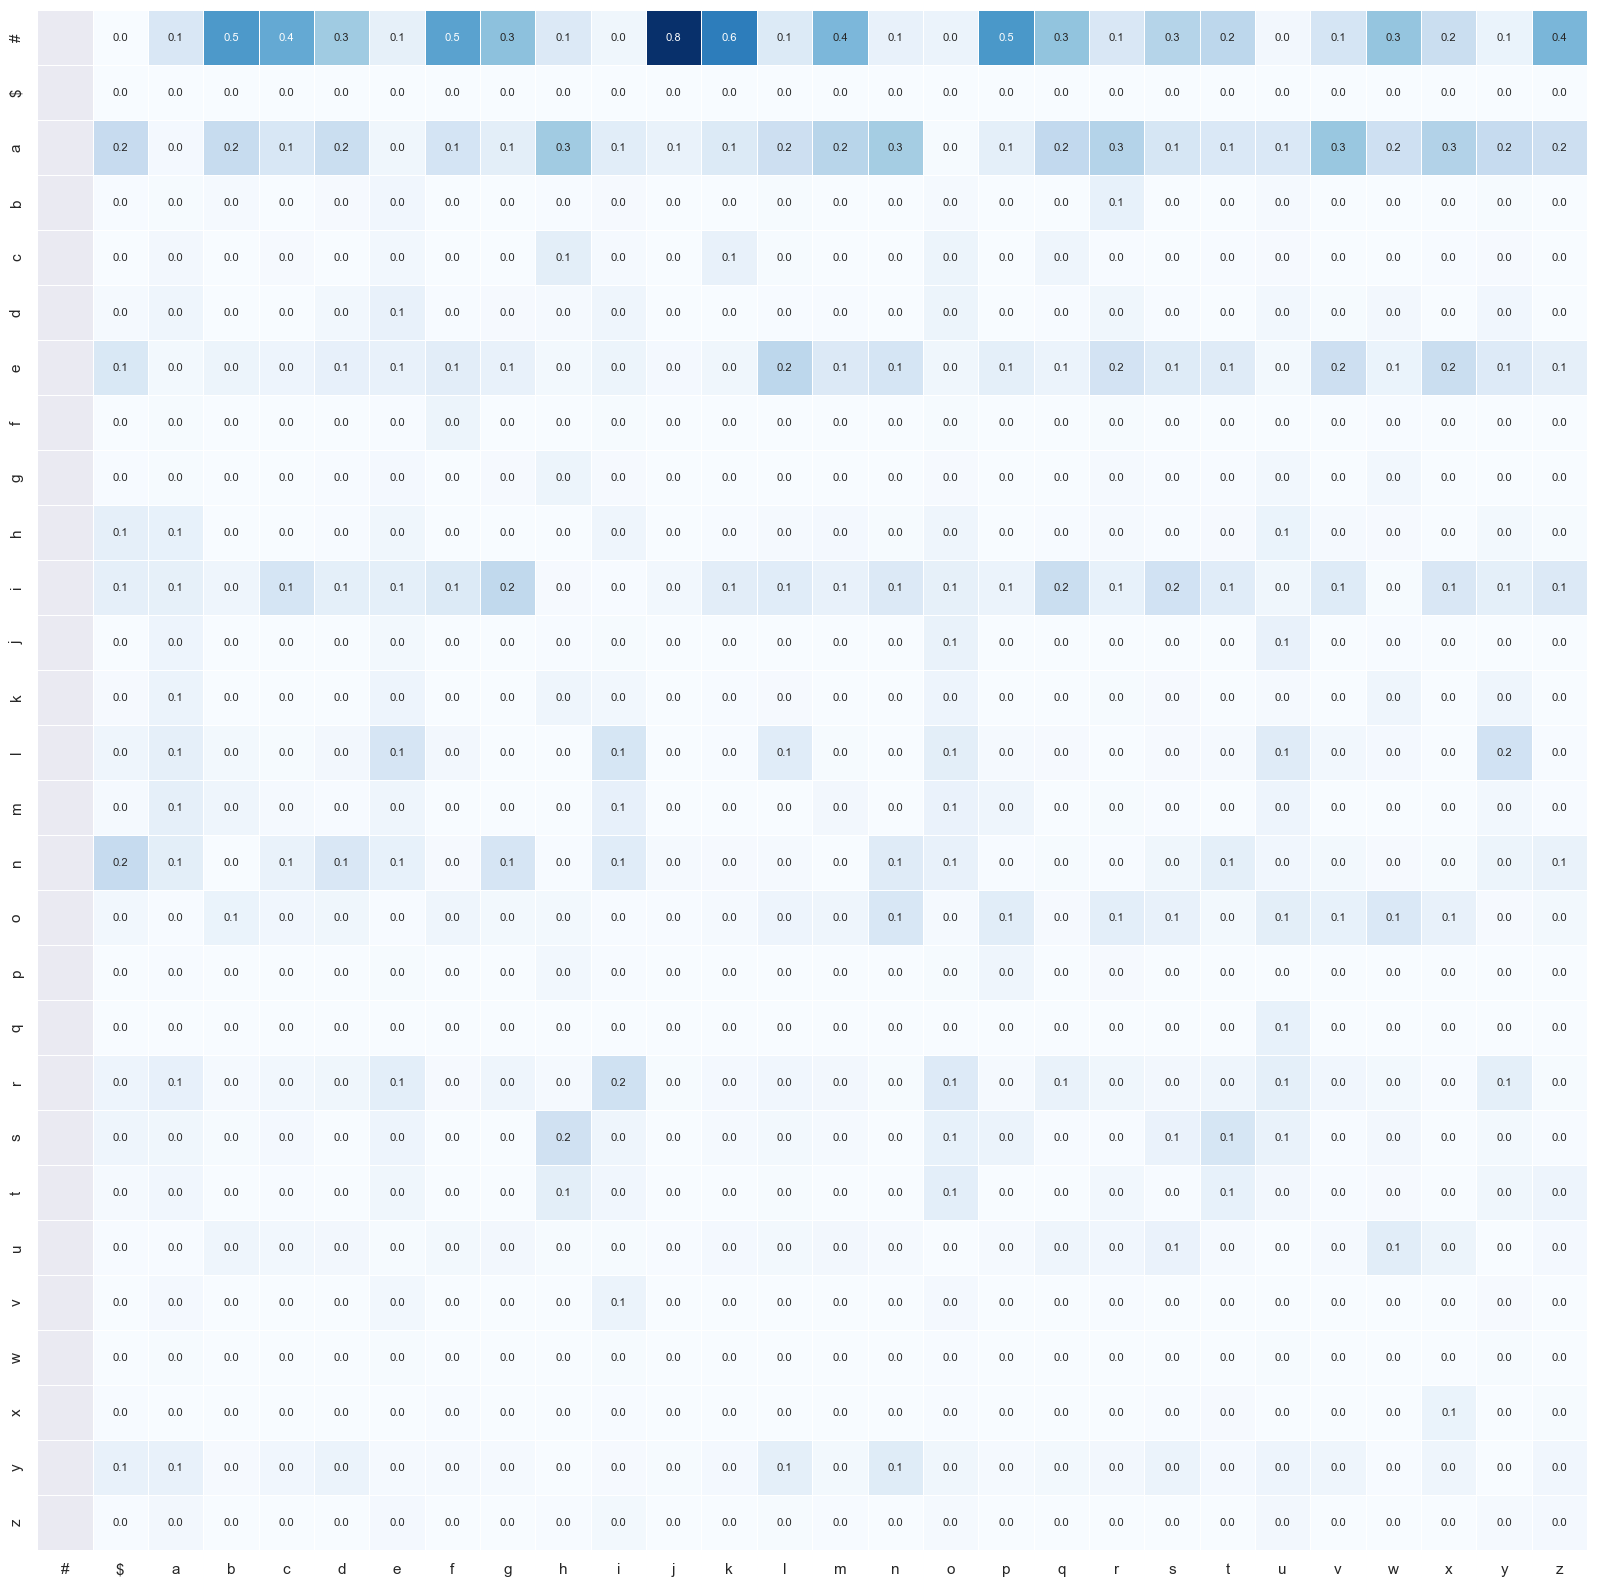

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(bigram_matrix)
df_values = df.applymap(lambda x: x[1] if pd.notnull(x) else 0)
df_prob =  df_values / df_values.sum(axis=0)
labels = list('#$') + characters
df_values.columns = labels
df_values.index = labels
df_prob.columns = labels
df_prob.index = labels


sns.set(rc={'figure.figsize':(20, 20)})
sns.set_style("darkgrid")
sns.heatmap(
    df_prob,
    xticklabels=labels,
    yticklabels=labels,
    annot=True, fmt=".1f",
    linewidth=.5, cbar=False,
    cmap="Blues",
    annot_kws={"fontsize":8}
)


# Normalized Counts ... Probabilities
* s.t each row sums to 1
* 0<=x<=1

* Maximize the likhelihood == product of all prob == max of the log likelikehood (since log is monotonic)
* Loss Function = -loglikelihood since we like to think of `loss` as low = better and high = bad
* The goal is to find the paramteres that best maximize the likelihood. 
    * in this example the paramters are simple and static ie the Matrix P
    * in case of NN we'll be estimating this P through backprop and P will be called Weights W

----

The `Maximum likelihoold estimation` is generally used to `estimate the parameters` of an underlying distribution, ie <u>the distribution where you think your data came from</u>
Why do such a thing ??
When you observe some data X let's say height of people in San Franciso, you would like to a general framework / probability distribution to work with. this is because you can do mathematical and statistical operations in a generalized fashion. Eg this might become a task of estimate the Mean and Variance of a normal distribution. 




In [31]:
import tensorflow as tf

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28,), name="layer1"),
        tf.keras.layers.Dense(units=28, activation="linear", name="layer2")
    ]
)

loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    name='categorical_crossentropy'
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss
)
            
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer2 (Dense)              (None, 28)                812       
                                                                 
Total params: 812
Trainable params: 812
Non-trainable params: 0
_________________________________________________________________


2023-01-07 22:42:55.791301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
